In [30]:
print ("Question 1")

Question 1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.spatial.distance import pdist
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
# a: Import the train/test files from Digit Recognizer 
train = pd.read_csv('F:/Annie/CornellMS/Semester 4/Machine Learning/HW1/Digit/train.csv', delimiter=',')
test = pd.read_csv('F:/Annie/CornellMS/Semester 4/Machine Learning/HW1/Digit/test.csv', delimiter=',')
train.shape

(42000, 785)

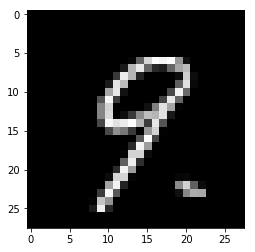

In [3]:
# b: Display one digit 
display_image = test.iloc[2]
display_image = np.array(display_image, dtype='uint8')
pixels = display_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')

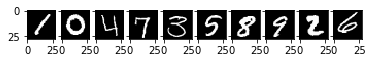

In [4]:
# b: Display one of each digit
def display_digit(file):
    unique = file['label'].unique()
    digits = {}
    for i in unique:
        digits[i] = np.where(train.label==i)[0][:1]
    fig, ax = plt.subplots(1, 10, sharex='col', sharey='row')
    for i in unique:
        display_image = train.iloc[list(digits.values())[i],1:785]
        display_image = np.array(display_image, dtype='uint8')
        pixels = display_image.reshape((28, 28))
        ax[i].imshow(pixels, cmap='gray')
display_digit(train)       

In [5]:
# c: Prior probabilities of each digit
prior_prob = train['label'].value_counts(normalize=True)
print (prior_prob)       
# Yes, it is almost uniform across digit because probability of each digit is .1 approximately. 

1    0.111524
7    0.104786
3    0.103595
9    0.099714
2    0.099452
6    0.098500
0    0.098381
4    0.096952
8    0.096738
5    0.090357
Name: label, dtype: float64


In [25]:
print ("Answer", "\n", "The prior probabilities of each class is approximately 0.1, which is our expectation for nearly evenly distributed class of 10 categories of number.")

Answer 
 The prior probabilities of each class is approximately 0.1, which is our expectation for nearly evenly distributed class of 10 categories of number.


(array([4132., 4684., 4177., 4351., 4072., 3795., 4137., 4401., 4063.,
        4188.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

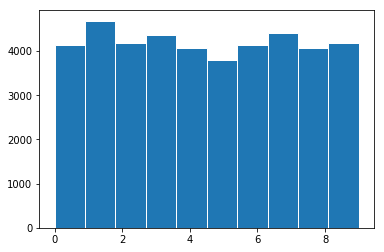

In [6]:
# c: Normalized histogram for each digit
plt.hist(train['label'], edgecolor='white',linewidth=1)

# Yes, the following plot reflects that it is nearly even.

In [27]:
print ("Answer", "\n", "The following plot can be mostly called even. There are 42000 digits in the training set, hence we would expect each digit to have a representation of 4200 which we can see approximately from the histogram. We notice that the number of 1s are the maximum and the number of 5s is the least.")

Answer 
 The following plot can be mostly called even. There are 42000 digits in the training set, hence we would expect each digit to have a representation of 4200 which we can see approximately from the histogram. We notice that the number of 1s are the maximum and the number of 5s is the least.


In [7]:
# d: Select examples of each digit
labels = np.asarray(train['label'])
def example_sample(labels):
    result = []
    for i in range(10):
        indices = np.where(labels == i)
        index = indices[0][0]
        result.append(index)
    return result
examples = example_sample(labels)
print(examples)

[1, 0, 16, 7, 3, 8, 21, 6, 10, 11]


In [8]:
# Calculate L2 distance
pixels = np.asarray(train[train.columns[1:]])
def nearest_points(example, data):
    nearest = []
    for e in example:
        target = data[e]
        dis = float('inf')
        for d in range(len(data)):
            if d == e:
                continue
            else:
                distance = np.linalg.norm(target - data[d])
                if distance < dis:
                    dis = distance
                    point = d
        nearest.append([dis, point])
    return nearest
nearest = nearest_points(examples, pixels)
print (nearest)

[[1046.5954328201515, 12950], [489.67948701165744, 29704], [1380.877257398354, 9536], [1832.6649993929605, 8981], [1356.8809822530493, 14787], [1066.3676664265472, 30073], [1446.5113203843239, 16240], [863.5010133172977, 15275], [1593.7775879965184, 32586], [910.5767403135224, 35742]]


In [9]:
# print error examples
error_examples = []
for i in range(len(nearest)):
    if labels[nearest[i][1]] == labels[examples[i]]:
        error_examples += [[examples[i], labels[examples[i]]]]
    else:
        error_examples += [[examples[i], labels[nearest[i][1]], '*']]
print(error_examples)

[[1, 0], [0, 1], [16, 2], [7, 5, '*'], [3, 4], [8, 5], [21, 6], [6, 7], [10, 8], [11, 9]]


In [10]:
# e: Genuine and imposters
digit_0 = np.array(train[train.columns[1:]][train.label == 0])
digit_1 = np.array(train[train.columns[1:]][train.label == 1])
genuine_0 = np.append([], pdist(digit_0))
genuine_1 = np.append([], pdist(digit_1))
imposter = euclidean_distances(digit_0, digit_1)

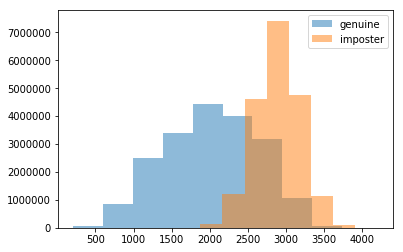

In [11]:
# Plot genuine and imposters
plt.hist(np.append(genuine_0, genuine_1), alpha = 0.5, label = 'genuine')
plt.hist(imposter.flatten(), alpha = 0.5, label = 'imposter')
plt.legend(loc='upper right')

In [12]:
# f: ROC curve generation
def roc(genuine, imposter):
    theta = np.linspace(min(genuine), max(imposter) + 1, 1000)
    tpr = np.array([])
    fpr = np.array([])
    for t in theta:
        tp = np.sum(genuine < t)
        fp = np.sum(imposter < t)
        fn = len(genuine) - np.sum(genuine < t)
        tn = len(imposter) - np.sum(imposter < t)
        tpr = np.append(tpr, tp/(tp + fn))
        fpr = np.append(fpr, fp/(fp + tn))
    return tpr, fpr

Text(0,0.5,'True Positive Rate')

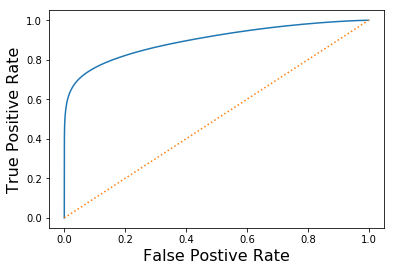

In [13]:
tpr, fpr = roc(np.append(genuine_0, genuine_1), imposter.flatten())
# Plot ROC curve
fig = plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], ':')
plt.xlabel('False Postive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

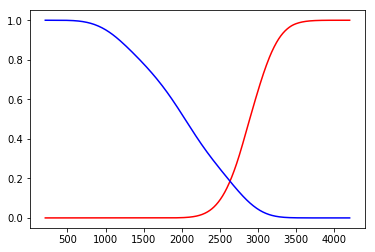

In [14]:
fnr = 1 - tpr
theta = np.linspace(min(np.append(genuine_0, genuine_1)), max(imposter.flatten()) + 1, 1000)
fig = plt.figure()
plt.plot(theta, fpr, 'r')
plt.plot(theta, fnr, 'b')

In [15]:
# Equal error generation 
def equalError(fpr, fnr):
    diff = fpr - fnr
    for i in range(len(diff)):
        if diff[i] > 0:
            break
    return (fpr[i - 1] + fpr[i])/2
equalError(fpr, fnr)

0.1865334958330681

In [29]:
# When a classifier guesses randomly, error rate will be high if it is a multiclass problem but if it is a 2-class problem
# Also, probability of occurence of each class affects the error rate
print ("Answer", "\n", "When we have a 2-class problem, and a majority occuring class in it, random guess might work decently well, especially when we output the major class. But when data-classes increases, error rate of random guess will start increasing. Random guess should not be used because we are not trying to find the features and weighing them to output class, hence usually there is possibility of incurring a high error rate.")

Answer 
 When we have a 2-class problem, and a majority occuring class in it, random guess might work decently well, especially when we output the major class. But when data-classes increases, error rate of random guess will start increasing. Random guess should not be used because we are not trying to find the features and weighing them to output class, hence usually there is possibility of incurring a high error rate.


In [16]:
# g: knn implementation
#def split_data(data):
#    data = np.array(data)
#    np.random.shuffle(data)
#    return [data[i::n] for i in range(n)]

def knn(tr, te, k):
    tr_label = tr.T[0].T
    te_label = te.T[0].T
    tr_data = tr.T[1:].T
    te_data = te.T[1:].T
    y_hat = np.zeros(len(te_label))
    for i in range(len(te_data)):
        distance = euclidean_distances([te_data[i]], tr_data)
        ind = np.argpartition(distance[0], k)[:k]
        nearest = tr_label[ind]
        counts = np.bincount(nearest)
        y_hat[i] = np.argmax(counts)
        if i % 1000 == 0: print(i)
    accuracy = sum(y_hat==te_label)/len(te_label)
    print("Accuracy: ", accuracy)
    return y_hat, accuracy

In [17]:
# h: 3-fold classification
#data = split_data(train, 3)
three = [i for i in np.linspace(0, len(train),4)]
print (train.shape[0], three)
data = np.array(train)
np.random.shuffle(data)
sol = []
for i in range(0, 3):
    t1, t2, t3, t4, t5, t6 = three[i], three[i+1], three[(i+1)%3], three[(i+1)%3 +1], three[(i+2)%3], three[(i+2)%3 +1]
    print (t1, t2, t3, t4, t5, t6 )
    test_val = data[int(t1):int(t2),:]
    train_val = np.concatenate((data[int(t3):int(t4),:], data[int(t5):int(t6),:]), axis=0)
    print (train_val.shape, test_val.shape)
    y, acc = knn(train_val, test_val, 5)
    sol += [y, acc]

42000 [0.0, 14000.0, 28000.0, 42000.0]
0.0 14000.0 14000.0 28000.0 28000.0 42000.0
(28000, 785) (14000, 785)
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
Accuracy:  0.9637857142857142
14000.0 28000.0 28000.0 42000.0 0.0 14000.0
(28000, 785) (14000, 785)
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
Accuracy:  0.9656428571428571
28000.0 42000.0 0.0 14000.0 14000.0 28000.0
(28000, 785) (14000, 785)
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
Accuracy:  0.9641428571428572


In [18]:
# Average accuracy
print (np.mean(acc))

0.9641428571428572


In [19]:
# i: Confusion matrix
test_label = test_val.T[0].T
def confusion(y_hat, y):
    table = np.zeros(shape=(10,10), dtype = np.uint16)
    np.set_printoptions(precision=0)
    for i in range(0, len(y_hat)):
        table[int(y_hat[i])][y[i]] += 1
    return table
confusion(sol[4:6][0], test_label)

array([[1427,    0,    8,    1,    1,    5,    8,    0,    6,    6],
       [   0, 1572,   20,    4,   11,    3,    5,   20,   18,    6],
       [   2,    5, 1349,    6,    0,    1,    0,    3,    3,    4],
       [   0,    1,    5, 1387,    0,   25,    0,    1,   25,    9],
       [   0,    0,    1,    0, 1316,    2,    2,    6,    8,   14],
       [   1,    0,    1,   13,    0, 1179,    6,    0,   19,    1],
       [   6,    1,    3,    2,    8,   15, 1341,    0,    4,    0],
       [   1,    5,   30,    7,    2,    0,    0, 1373,    5,   28],
       [   0,    0,    2,    6,    1,    3,    1,    0, 1266,    2],
       [   1,    1,    1,    7,   30,    8,    0,   18,   18, 1288]],
      dtype=uint16)

In [20]:
#j : Train-test classification using the entire data
def knn_classifier(tr, te, k):
    tr_label = tr.T[0].T
    tr_data = tr.T[1:].T
    y_hat = np.zeros(len(te))
    for i in range(len(te)):
        distance = euclidean_distances([te[i]], tr_data)
        ind = np.argpartition(distance[0], k)[:k]
        nearest = tr_label[ind]
        counts = np.bincount(nearest)
        y_hat[i] = np.argmax(counts)
        if i % 1000 == 0: print(i)
    return y_hat

In [21]:
train_data = np.array(train)
test_data = np.array(test)
test_labels = knn_classifier(train_data, test_data, 5)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000


In [24]:
final_out = pd.DataFrame(test_labels, columns=['Label'])
final_out['ImageId'] = range(1, len(final_out) + 1)
final_out = final_out.set_index('ImageId')
final_out.to_csv('F:/Annie/CornellMS/Semester 4/Machine Learning/HW1/Digit/Digit_Submission.csv')